## 📚 Import Required Libraries

In [ ]:
# Importing essential libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations

# Scikit-learn modules for model building and evaluation
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.svm import SVC  # Support Vector Classifier for classification task
from sklearn.metrics import classification_report, confusion_matrix  # To evaluate model performance

# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and label encoding




## 📂 Load the Dataset

In [194]:
df=pd.read_csv("Cancer_Data.csv")


🧹 Data Cleaning: Removing Unnecessary Columns


In [ ]:
# Dropping irrelevant or unnecessary columns: 'id' (unique identifier) and 'Unnamed: 32' (empty/NaN column)
df = df.drop(columns=["id", "Unnamed: 32"])


🔎 Checking for Missing Values



In [ ]:
# Checking for missing (null) values in each column of the dataset
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

🔁 Encoding Categorical Labels



In [ ]:
# Converting the 'diagnosis' column from categorical (M/B) to numerical (1/0)
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])


## 🧮 Splitting Features and Target Variable


In [198]:
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

✂️ Splitting the Dataset into Training and Testing Sets



In [ ]:
# Splitting the dataset into training and testing sets
# 80% for training and 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


⚖️ Feature Scaling with StandardScaler



In [ ]:
# Initializing StandardScaler to normalize feature values (mean=0, std=1)
# Setting output to 'pandas' to keep the result as a DataFrame
sacled = StandardScaler().set_output(transform="pandas")

# Fitting the scaler on training data and transforming it
X_train_sacled = sacled.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test_sacled = sacled.transform(X_test)


🤖 Training the Support Vector Machine (SVM) Classifier

In [ ]:
# Initializing the Support Vector Classifier (SVC) model
model = SVC()

# Training the model on the scaled training data
model.fit(X_train_sacled, y_train)


SVC()

📌 Making Predictions on the Test Set

In [207]:
# Using the trained SVM model to make predictions on the scaled test data
y_pred = model.predict(X_test_sacled)


c:\Users\Just Do it\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


📊 Evaluating Model Performance

In [ ]:
# Printing the confusion matrix to show prediction accuracy across classes
print(confusion_matrix(y_pred, y_test))

# Displaying a detailed classification report with precision, recall, f1-score, and support
print(classification_report(y_pred, y_test))


[[71  2]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.95      1.00      0.98        41

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



📈 Visualizing the Confusion Matrix.

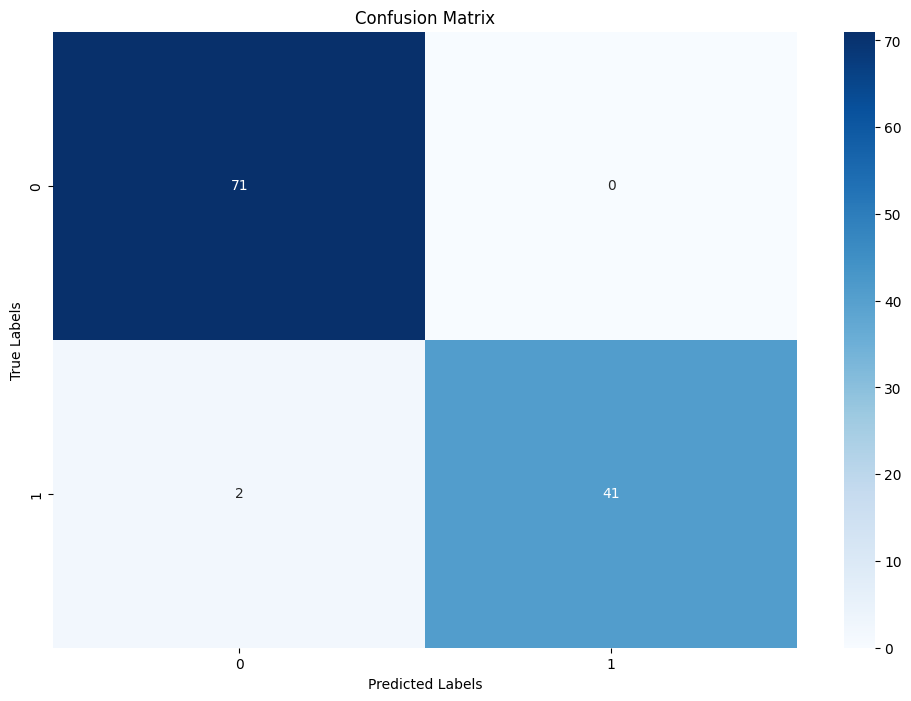

In [208]:
# Setting the figure size for the plot (note: should be plt.figure, not plt.Figure)
plt.figure(figsize=(12, 8))

# Creating a heatmap to visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

# Adding labels and title for clarity
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
